# Image Classification on CIFAR-10 keras Dataset

CIFAR-10 is a dataset of 50,000 32x32 color training images and 10,000 test images, labeled over 10 categories.

labels are  ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

## Import some useful libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**Load in the data**

In [4]:
from tensorflow.keras.datasets import cifar10

In [5]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 460s 3us/step


### Check an image

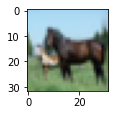

In [31]:
plt.figure(figsize=(1.5,1.5))
plt.imshow(x_train[12])

## Scale x_train and x_test

In [10]:
x_train = x_train/255
x_test = x_test/255

## One hot encode y_train and y_test

In [11]:
from tensorflow.keras.utils import to_categorical
y_cat_train = to_categorical(y_train)
y_cat_test = to_categorical(y_test)

# Create Convolutional model

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [33]:
model = Sequential()

# Convolutional layer
model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=(32,32,3), activation='relu'))

# Pooling layer
model.add(MaxPool2D(pool_size=(2,2)))

# Convolutional layer
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32,32,3), activation='relu'))

# Pooling layer
model.add(MaxPool2D(pool_size=(2,2)))

# Flatten the inputs
model.add(Flatten())
model.add(Dense(128, activation='relu'))

# Output layer
model.add(Dense(10, activation='softmax'))

# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

### Create early stopping callback

In [35]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', mode='min', patience=2)

# train/fit the model

In [36]:
model.fit(x_train, y_cat_train, epochs=15, validation_data=(x_test, y_cat_test), callbacks=[early_stopping])

Epoch 1/15
1563/1563 [==============================] - 96s 48ms/step - loss: 1.5469 - accuracy: 0.4379 - val_loss: 1.3828 - val_accuracy: 0.5018
Epoch 2/15
1563/1563 [==============================] - 45s 29ms/step - loss: 1.2461 - accuracy: 0.5600 - val_loss: 1.1768 - val_accuracy: 0.5832
Epoch 3/15
1563/1563 [==============================] - 47s 30ms/step - loss: 1.1044 - accuracy: 0.6100 - val_loss: 1.1459 - val_accuracy: 0.6003
Epoch 4/15
1563/1563 [==============================] - 47s 30ms/step - loss: 1.0107 - accuracy: 0.6440 - val_loss: 1.0628 - val_accuracy: 0.6335
Epoch 5/15
1563/1563 [==============================] - 47s 30ms/step - loss: 0.9367 - accuracy: 0.6700 - val_loss: 1.0412 - val_accuracy: 0.6414
Epoch 6/15
1563/1563 [==============================] - 48s 31ms/step - loss: 0.8784 - accuracy: 0.6923 - val_loss: 1.0024 - val_accuracy: 0.6528
Epoch 7/15
1563/1563 [==============================] - 49s 31ms/step - loss: 0.8231 - accuracy: 0.7122 - val_loss: 1.0001 -

## Save the model

In [63]:
model.save('cifar10_classifier.h5')

## Evaluate the model

In [65]:
metrics = pd.DataFrame(model.history.history)

In [70]:
metrics

,loss,accuracy,val_loss,val_accuracy
0,1.546948,0.43794,1.382767,0.5018
1,1.246055,0.56002,1.176787,0.5832
2,1.104442,0.60998,1.145886,0.6003
3,1.010652,0.64400,1.062784,0.6335
4,0.936746,0.66996,1.041156,0.6414
5,0.878438,0.69228,1.002396,0.6528
6,0.823065,0.71218,1.000058,0.6564
7,0.774919,0.72924,0.958387,0.6720
8,0.737357,0.74092,0.961291,0.6736
9,0.702894,0.75262,0.969400,0.6692


<AxesSubplot:>

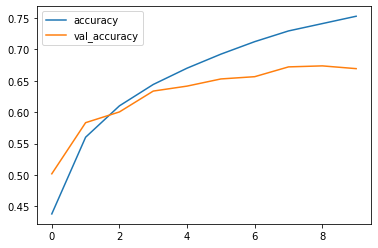

In [71]:
metrics[['accuracy', 'val_accuracy']].plot()

<AxesSubplot:>

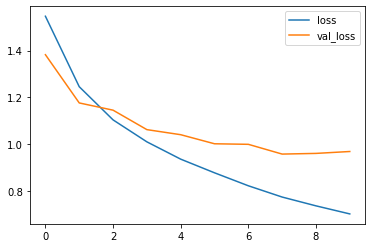

In [73]:
metrics[['loss', 'val_loss']].plot()

# Confusion matrix and classification report

In [40]:
from sklearn.metrics import confusion_matrix, classification_report

In [41]:
predictions = model.predict(x_test)
predictions = np.argmax(predictions, axis=1)

313/313 [==============================] - 4s 12ms/step


## Confusion Matrix

<AxesSubplot:>

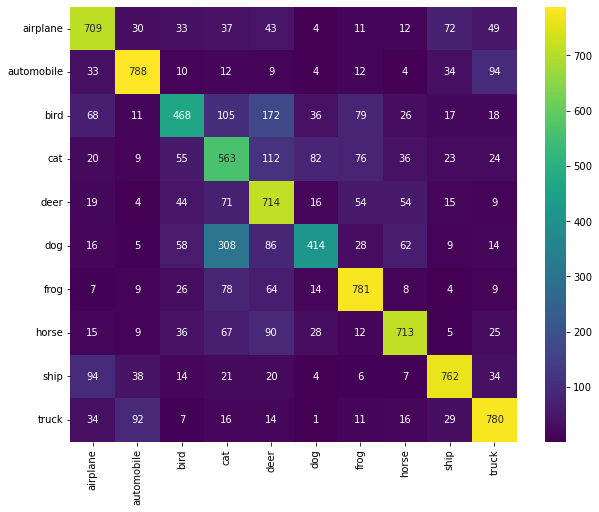

In [53]:
con_mat = confusion_matrix(y_test, predictions)
labels = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
plt.figure(figsize=(10,8))
sns.heatmap(con_mat, yticklabels=labels, annot=True, fmt='d', cmap='viridis', xticklabels=labels)

## Classification Report

In [55]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.70      0.71      0.70      1000
           1       0.79      0.79      0.79      1000
           2       0.62      0.47      0.53      1000
           3       0.44      0.56      0.49      1000
           4       0.54      0.71      0.61      1000
           5       0.69      0.41      0.52      1000
           6       0.73      0.78      0.75      1000
           7       0.76      0.71      0.74      1000
           8       0.79      0.76      0.77      1000
           9       0.74      0.78      0.76      1000

    accuracy                           0.67     10000
   macro avg       0.68      0.67      0.67     10000
weighted avg       0.68      0.67      0.67     10000



## Predicting a sample image

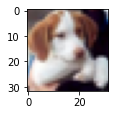

In [74]:
sample_image = x_test[16]
plt.figure(figsize=(1.5,1.5))
plt.imshow(sample_image)

In [75]:
y_test[16]

array([5], dtype=uint8)

**True class is dog** (class 5 corresponds to dog)

In [60]:
np.argmax(model.predict(sample_image.reshape(1,32,32,3)), axis=1)

1/1 [==============================] - 0s 21ms/step


array([5], dtype=int64)

**Predicted class is also dog** (class 5 corresponds to dog)

# Done